In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [13]:
# Dado que o ranfge de valores possíveis para um pixesvai de 0-255
# Escalonamos os valores entre 0-1
# Esse processo torna o nosso modelo menos variante a pequenas alterações
# x_train = x_train / 255
# x_test = x_test / 255


# Import the necessary modules
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

import numpy as np
# Combine training and testing data using numpy.concatenate
x_train = np.concatenate([x_train, x_test], axis=0)  # Concatenate along the sample axis (axis=0)
y_train = np.concatenate([y_train, y_test], axis=0)  # Concatenate along the sample axis (axis=0)

# Preprocess the data
# Reshape the data to (num_samples, 28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize pixel values to the range [0, 1]
x_train = x_train / 255
x_test = x_test / 255

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Usada na camada de saída do classificador, onde realmente estamos tentando
# gerar as probabilidades para definir a classe de cada entrada.

optimizer = Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

# Reduz o parâmetro de learning rate se não houver melhoras em determinado número de épocas
# Útil para encontrar o mínimo global
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,659,146 (6.33 MB)

 Trainable params: 1,659,146 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
batch_size = 32
epochs = 10

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    #validation_data=(x_test, y_test),
                    verbose=1,
                    callbacks=[learning_rate_reduction]
)

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

range_epochs = range(1, len(acc) + 1)

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8847 - loss: 0.3620 - val_accuracy: 0.9870 - val_loss: 0.0417 - learning_rate: 0.0010
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9761 - loss: 0.0819 - val_accuracy: 0.9909 - val_loss: 0.0304 - learning_rate: 0.0010
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9824 - loss: 0.0586 - val_accuracy: 0.9911 - val_loss: 0.0304 - learning_rate: 0.0010
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9866 - loss: 0.0439 - val_accuracy: 0.9902 - val_loss: 0.0315 - learning_rate: 0.0010
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9889 - loss: 0.0367 - val_accuracy: 0.9922 - val_loss: 0.0277 - learning_rate: 0.0010
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9897 - loss: 0.0345 - val_accuracy: 0.9921 - val_loss: 0.0284 - learning_rate: 0.0010
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9914 - 

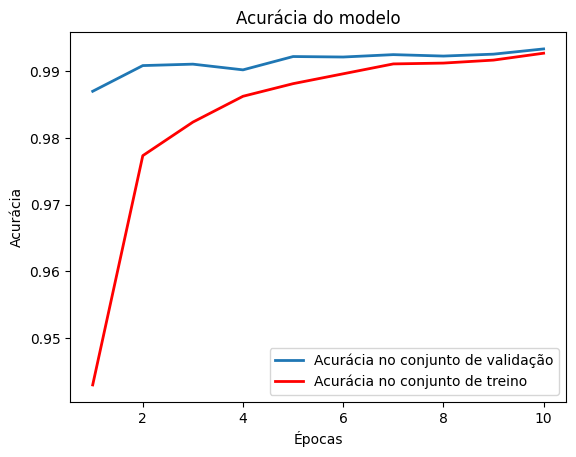

In [16]:
import matplotlib.pyplot as plt

plt.style.use('default')
accuracy_val = plt.plot(range_epochs, val_acc, label='Acurácia no conjunto de validação')
accuracy_train = plt.plot(range_epochs, acc, label='Acurácia no conjunto de treino', color='r')

plt.setp(accuracy_val, linewidth=2.0)
plt.setp(accuracy_train, linewidth=2.0)
plt.title('Acurácia do modelo')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.show()
